In [211]:
import pandas as pd
     
df_orders   = pd.read_csv('orders.csv', delimiter=',')
df_visitors = pd.read_csv('visitors.csv', delimiter=',')
df_logs_exp = pd.read_csv('logs_exp.csv', delimiter='\t')

In [212]:
# Выводим информацию о данных датасета
print(df_orders.info(),   end='\n\n')
print(df_visitors.info(), end='\n\n')
print(df_logs_exp.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          ------------

In [213]:
# Выводим первые 5 строк датасета orders
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [214]:
# Выводим первые 5 строк датасета visitors
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [215]:
# Выводим первые 5 строк датасета logs_exp
df_logs_exp.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Названия столбцов нужно привести к единому регистру, переименовывать не нужно так как названия столбцов соответствуют содержимому.

In [216]:
# Исправляем названия столбцов
df_logs_exp.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']
df_orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
     

<h1>Предварительная подготовка данных</h1>

<h2>Обработка пропусков</h2>

In [217]:
# Поиск пустых значений
print('Пропуски в столбцах logs_exp.csv:', df_logs_exp.isnull().sum(), sep='\n', end='\n\n')
print('Пропуски в столбцах orders.csv:',   df_orders.isnull().sum(),   sep='\n', end='\n\n')
print('Пропуски в столбцах visitors.csv:', df_visitors.isnull().sum(), sep='\n', end='\n\n')

Пропуски в столбцах logs_exp.csv:
event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

Пропуски в столбцах orders.csv:
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Пропуски в столбцах visitors.csv:
date        0
group       0
visitors    0
dtype: int64



<h2>Обработка явных дубликатов</h2>

In [218]:
# проверим, есть ли дубликаты в таблице
print('Кол-во явных дубликатов в logs_exp.csv:', df_logs_exp.duplicated().sum())
print('Кол-во явных дубликатов в orders.csv:',   df_orders.duplicated().sum())
print('Кол-во явных дубликатов в visitors.csv:', df_visitors.duplicated().sum())

Кол-во явных дубликатов в logs_exp.csv: 413
Кол-во явных дубликатов в orders.csv: 0
Кол-во явных дубликатов в visitors.csv: 0


In [219]:
# Удаляем дубликаты
df_logs_exp.drop_duplicates(inplace=True)
print('Кол-во явных дубликатов в logs_exp.csv:', df_logs_exp.duplicated().sum())

Кол-во явных дубликатов в logs_exp.csv: 0


<h2>Обработка неявных дубликатов</h2>

In [220]:
# проверим неявные дубликаты
for column in df_orders.columns:
    print('Уникальные значения поля', column, ': ', df_orders[column].unique())

Уникальные значения поля transaction_id :  [3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]
Уникальные значения поля visitor_id :  [3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]
Уникальные значения поля date :  ['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']
Уникальные значения поля revenue :  [   1650     730     400    9759    2308    2210    1860    1044   13710
    1855    4008    4499    7370   11985   10980   15277    1060     990
   16490    1190     300    1050     632   15185    7555    3488    7620
    5280     700     190     383    1680   22785    2355    2470    6250
  

In [221]:
for column in df_visitors.columns:
    print('Уникальные значения поля', column, ': ', df_visitors[column].unique())

Уникальные значения поля date :  ['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
Уникальные значения поля group :  ['A' 'B']
Уникальные значения поля visitors :  [719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707
 655 709 654 369 721 543 769 746 544 413 421 737 487 560 656 650 546 378
 679 676 720 531]


In [222]:
for column in df_logs_exp.columns:
    print('Уникальные значения поля', column, ': ', df_logs_exp[column].unique())

Уникальные значения поля event_name :  ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
Уникальные значения поля device_id_hash :  [4575588528974610257 7416695313311560658 3518123091307005509 ...
 6660805781687343085 7823752606740475984 3454683894921357834]
Уникальные значения поля event_timestamp :  [1564029816 1564053102 1564054127 ... 1565212483 1565212498 1565212517]
Уникальные значения поля exp_id :  [246 248 247]


<h2>Исправление типов данных</h2>

In [223]:
# Проверка типов данных
df_logs_exp.dtypes

event_name         object
device_id_hash      int64
event_timestamp     int64
exp_id              int64
dtype: object

In [224]:
# Установка необходимых типов данных
df_logs_exp['event_name'] = df_logs_exp['event_name'].astype('string')
df_logs_exp['event_timestamp'] = pd.to_datetime(df_logs_exp['event_timestamp'], unit='s')

In [225]:
# Проверка типов данных
df_orders.dtypes

transaction_id     int64
visitor_id         int64
date              object
revenue            int64
group             object
dtype: object

In [226]:
# Установка необходимых типов данных
df_orders['date'] = df_orders['date'].astype('datetime64[ns]')
df_orders['group'] = df_orders['group'].astype('string')

In [227]:
# Проверка типов данных
df_visitors.dtypes

date        object
group       object
visitors     int64
dtype: object

In [228]:
# Установка необходимых типов данных
df_visitors['date'] = df_visitors['date'].astype('datetime64[ns]')
df_visitors['group'] = df_visitors['group'].astype('string')

<h1>Первая часть</h1>

<h2>Поиск и удаление пересекающихся пользователей</h2>

In [229]:
# Выделяем группы А и В теста
df_orders_A = df_orders.loc[df_orders['group'] == 'A']
df_orders_B = df_orders.loc[df_orders['group'] == 'B']

# Находим пересечения пользователей
df_orders_intr = pd.merge(df_orders_A, df_orders_B, how ='inner', on =['visitor_id'])
df_orders_intr

,transaction_id_x,visitor_id,date_x,revenue_x,group_x,transaction_id_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


In [230]:
# # Созраняем копию дата фрейма без пересечаний пользователей
# Удаляем пересечения пользователей
df_orders = df_orders.drop( df_orders.loc[df_orders['visitor_id'].isin(df_orders_intr['visitor_id'])].index )

# Проверка удаления пересечений пользователей
print('Кол-во пересечений: ', len( pd.merge(df_orders.loc[df_orders['group'] == 'A']
                                           ,df_orders.loc[df_orders['group'] == 'B']
                                           ,how ='inner', on =['visitor_id']) ) )

Кол-во пересечений:  0


In [231]:
# Выделяем группы А и В теста
df_visitors_A = df_visitors.loc[df_visitors['group'] == 'A']
df_visitors_B = df_visitors.loc[df_visitors['group'] == 'B']

# Находим пересечения пользователей
df_visitors_intr = pd.merge(df_visitors_A, df_visitors_B, how ='inner', on =['visitors'])
df_visitors_intr

,date_x,group_x,visitors,date_y,group_y
0,2019-08-08,A,610,2019-08-09,B
1,2019-08-11,A,718,2019-08-31,B
2,2019-08-30,A,490,2019-08-30,B


In [232]:
# # Создаем копию дата фрейма без пересечений пользователей

# Удаляем пересечения пользователей
df_visitors = df_visitors.drop( df_visitors.loc[df_visitors['visitors'].isin(df_visitors_intr['visitors'])].index )


# Проверка удаления пересечений пользователей
print('Кол-во пересечений: ', len( pd.merge(df_visitors.loc[df_visitors['group']=='A']
                                           ,df_visitors.loc[df_visitors['group']=='B']
                                           ,how='inner', on=['visitors']) ) )

Кол-во пересечений:  0


В обоих датафреймах были обнаруженны пересечения пользователей которые пришлось удалять для обеспечения корректности последующего анализа.

## Создание массива уникальных пар значений дат и групп теста

In [233]:
datesGroups = df_orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


## Получение агрегированных кумулятивных данных о заказах по дням 

In [234]:
import numpy as np


ordersAggregated = datesGroups.apply(
      lambda x: df_orders[
              np.logical_and(df_orders['date']  <= x['date'],
                             df_orders['group'] == x['group'] )
          ].agg({'date'           : 'max',
                 'group'          : 'max',
                 'transaction_id' : 'nunique',
                 'visitor_id'     : 'nunique',
                 'revenue'        : 'sum'}
               ),
      axis=1
).sort_values(by=['date', 'group'])

# Выводим результат
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


## Получение агрегированных кумулятивных данных о посетителях по дням

In [235]:
visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[
            np.logical_and(df_visitors['date']  <= x['date'],
                           df_visitors['group'] == x['group'])
        ].agg({'date'     : 'max',
               'group'    : 'max',
               'visitors' : 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

# Выводим результат
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
757,2019-08-29,A,16219
533,2019-08-29,B,17098
690,2019-08-29,B,17098
930,2019-08-29,B,17098


## Объединение данных в одной таблице

In [236]:
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated,
        #  how='outer',
        #  how='inner',
         on=['date', 'group'])

# Выводим результат
cumulativeData

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,A,451,430,3233233,16219
58,2019-08-29,B,510,490,4746610,17098
59,2019-08-29,B,510,490,4746610,17098
60,2019-08-29,B,510,490,4746610,17098


In [237]:
# Изменим названия столбцов
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Выводим результат
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,A,451,430,3233233,16219
58,2019-08-29,B,510,490,4746610,17098
59,2019-08-29,B,510,490,4746610,17098
60,2019-08-29,B,510,490,4746610,17098


Теперь все агрегированные кумулятивные данные по действиям посетителей тестируемого объекта сведены в одной таблице

##  Задание индивидуального варианта для 1 части

### 3 вариант

Изобразить график конверсии по группам А и B. По оси x – date, по оси y – конверсия.

Конверсия — это отношение числа посетителей сайта, выполнивших на нём какие-либо целевые действия к общему числу посетителей сайта, выраженное в процентах.

In [241]:
# Комулятивные данные о группе А
cumulativeRevenueA = cumulativeData.loc[cumulativeData['group'] == 'A']
# Комулятивные данные о группе В
cumulativeRevenueB = cumulativeData.loc[cumulativeData['group'] == 'B']

In [239]:
A = cumulativeRevenueA['date'].value_counts().to_frame()
B = cumulativeRevenueB['date'].value_counts().to_frame()

A.columns = ['ValDate']
B.columns = ['ValDate']

A.reset_index(drop=True, inplace=True)
B.reset_index(drop=True, inplace=True)

s_A = cumulativeRevenueA.drop_duplicates()
s_B= cumulativeRevenueB.drop_duplicates()

s_A.reset_index(drop=True, inplace=True)
s_B.reset_index(drop=True, inplace=True)

s_A = pd.concat([A,s_A],axis = 1)
s_B = pd.concat([B,s_B],axis = 1)

s_A['ValDate/visitors,%'] = s_A['ValDate']/s_A['visitors']*100
s_B['ValDate/visitors,%'] = s_B['ValDate']/s_B['visitors']*100

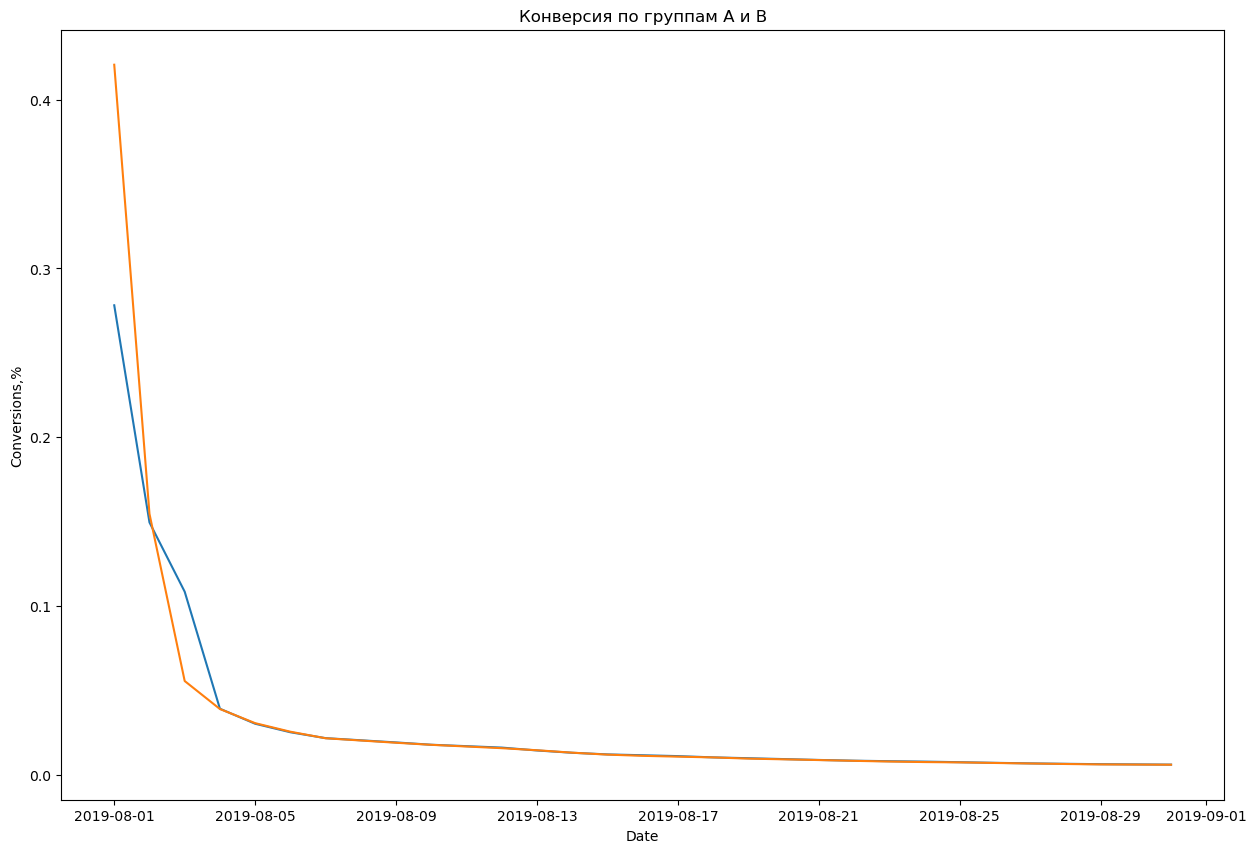

In [240]:
from matplotlib import pyplot as plt


# Построениие графика
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)  

x = cumulativeRevenueA['date'].drop_duplicates()
y = s_A['ValDate/visitors,%']
ax.plot(x, y, label = 'Group A')
y = s_B['ValDate/visitors,%']
ax.plot(x, y, label = 'Group B')

ax.set_title('Конверсия по группам А и B')
ax.set_xlabel('Date')
ax.set_ylabel('Conversions,%')

plt.show()

## Вывод по первой части
Выполнив первую часть работы мы научились определять пересечения групп пользователя для А/А и А/В теста. Так же мы разобрались с тем что из себя представляют агрегированные кумулятивные данные полученные из сырых дынных логов системы, научились их создавать и строить по ним графики.